In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/MyDrive/MyDrive/datasets/cleanedsentiment.csv')

In [5]:
df.head()

,sentiment,tweet
0,0,drop iphone work look replacement
1,0,feel c y day
2,4,heycassadee malaysia far away japan
3,4,fold clothe mommy ethan turn toss ethan pile c...
4,4,accomplish


In [6]:
df.shape

(320000, 2)

In [7]:
df['length'] = df['tweet'].str.split().str.len()

In [8]:
df.isnull().sum()

sentiment      0
tweet        381
length       381
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

sentiment    0
tweet        0
length       0
dtype: int64

In [11]:
df.shape

(319619, 3)

In [12]:
df['length'] = df['length'].astype('int')

In [13]:
df[df['length'].max() == df['length']]

,sentiment,tweet,length
14968,0,v a m i d y th y h i m t cho s kho c a c n qu ...,42


In [14]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

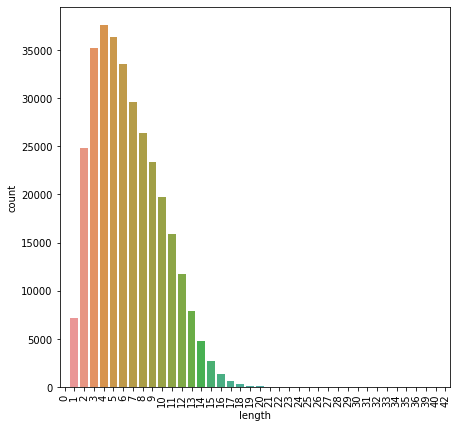

In [15]:
plt.figure(figsize=(7,7))
seaborn.countplot(x='length', data=df)
plt.xticks(rotation = 90)
plt.show()

In [16]:
# I will drop all the instances with length more than 21

In [17]:
final_dataset = df[(df['length'] < 22) & (df['length'] > 0)]

In [18]:
final_dataset.shape

(319530, 3)

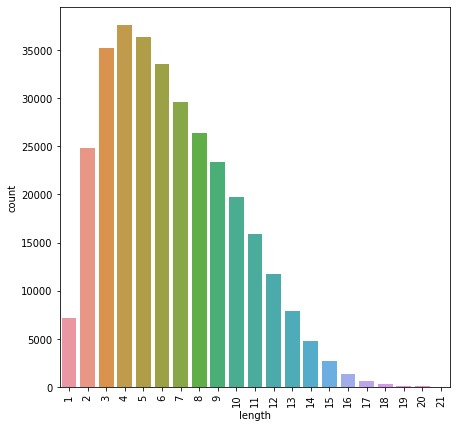

In [19]:
plt.figure(figsize=(7,7))
seaborn.countplot(x='length', data=final_dataset)
plt.xticks(rotation = 90)
plt.show()

In [20]:
final_dataset.drop('length', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


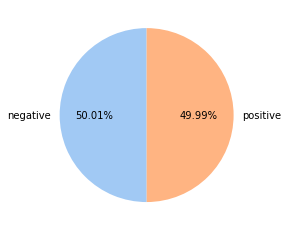

In [21]:
colors = seaborn.color_palette('pastel')[0:2]
plt.pie(final_dataset['sentiment'].value_counts(), labels=['negative', 'positive'], colors = colors, autopct='%.2f%%', startangle=90)
plt.show()

In [21]:
# dataset is still balanced and we can proceed further for training

In [22]:
final_dataset.to_csv('/content/MyDrive/MyDrive/datasets/finaldataset.csv', index=False)